# Неявный метод

Решаем задачу 3.9 из сборника Дьяченко.

\begin{equation}
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=u^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\alpha\right) \\
\alpha \in\{2.0,0.0\} \\
x=0: \frac{\partial u}{\partial x}=0 \\
x=1: \frac{\partial u}{\partial x}+u^{2}=0 \\
t=0: u=x^{2}\left(1-x^{2}\right)+0.1
\end{array}\right.
\end{equation}

Запишем разностную схему:
$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} = ({u}^{n}_{m})^2 \left( \frac{u^{n+1}_{m+1} - 2u^{n+1}_{m} + u^{n+1}_{m-1}}{h^2} + \alpha \right)$$

Перепишем в виде, удобным для метода прогонки:
$$-\frac{\tau \sigma}{h^2} u^{n+1}_{m+1} + \left( 1+ \frac{2\tau \sigma}{h^2}  \right)u^{n+1}_{m} -\frac{\tau \sigma}{h^2} u^{n+1}_{m-1} = u^{n}_{m} + \alpha \tau (u^{n}_m)^2 ,$$
где $\sigma(n, m) =  (u^{n}_{m})^2$
$$a = -\frac{\tau \sigma}{h^2}, $$
$$b =  1+ \frac{2\tau \sigma}{h^2} $$ 
$$c = -\frac{\tau \sigma}{h^2}$$
$$\epsilon = u_m^n + \alpha \tau (u^{n}_m)^2$$

И самое главное:
$$u^{n+1}_{m} = \alpha_m u^{n+1}_{m+1} + \beta_m = -\frac{a^n_m}{b^n_m + c^n_m \alpha_{m-1}} u^{n+1}_{m+1} + \frac{\epsilon_m^n - c_m^n \beta_{m-1}^n}{b^n_m + c^n_m \alpha_{m-1}} $$

Из левого краевого, $u_1^{n+1} = u_{-1}^{n+1}$, т.е.:
$$\alpha_0 = 1, \ \ \beta_0=0$$
Из правого краевого, записывая:
$$\frac{u_{M+1}^{n+1} - u_{M-1}^{n+1}}{2h} + (u_M^n)^2 = 0$$
получаем
$$ u_{M+1}^{n+1} - u_{M-1}^{n+1} =- 2h \cdot (u_M^n)^2$$
В текущей версии даже:
$$ u_{M+1}^{n+1} - u_{M-1}^{n+1} =- 2h \cdot (2u_M^n - u_{M}^{n-1})^2, \ \ n \ge 1$$

## Анализ устойчивости

$\Delta_m = \delta_m^n, \ \ \delta_m = \delta_{m+1}^n$
Применим метод замороженных коэффициентов. Из решения $v_m^n = u_m^n + \delta_m^n$, $v_m^{n+1} = u_m^{n+1} + \delta_m$ вычтем решение $u_m^n$. 

Обозначая
$$U = \frac{u^{n+1}_{m+1} - 2u^{n+1}_{m} + u^{n+1}_{m-1}}{h^2}$$

$$D = \frac{\delta^{n+1}_{m+1} - 2\delta^{n+1}_{m} + \delta^{n+1}_{m-1}}{h^2}$$


Получим:

\begin{equation}
    \frac{\delta^{n+1}_{m} - \delta^{n}_{m}}{\tau} = (U+D+\alpha)(u_m^n + \delta_m^n)^2 -
    (U + \alpha)(u_m^n)^2 = \\
    = 2u_m^n \delta_m^n (U+\alpha) + D (u_m^n)^2 + O(\delta^2) 
\end{equation}

Замораживая оставшиеся коэффициенты $u^{n+1}_{m+1}, u^{n+1}_{m}, u^{n+1}_{m-1}$ в произвольной фиксированной точке $u$, получаем, что $U = 0$, и итоговая схема имеет вид(отбрасывая члены второго порядка малости по $\delta$):

\begin{equation}
    \frac{\delta^{n+1}_{m} - \delta^{n}_{m}}{\tau} - a^2 \frac{\delta^{n+1}_{m+1} - 2\delta^{n+1}_{m} + \delta^{n+1}_{m-1}}{h^2} = 0
\end{equation}

Анализируем далее спектральную устойчивость полученной схемы. Подставляя $\delta_{m}^n = \lambda^n e^{i m \phi}$, и сразу разделив на $\lambda^n e^{i m \phi}$:

\begin{equation}
\frac{\lambda - 1}{\tau} = a \lambda \frac{e^{i \phi} + e^{-i \phi} - 2}{h^2} =\lambda \frac{2a (\cos {\phi} - 1) }{h^2}
\end{equation}

Откуда

$$\lambda = \frac{1}{1 + \frac{2a^2 \tau}{h^2}(1- \cos{\phi})} \ \ \Rightarrow$$
$$| \lambda |^2 \le 1$$

Последнее неравенство выполняется  для любого $\phi$. Таким образом схема бесусловно устойчива.

# Явный метод

Схема:
$$\frac{u_{n+1}^{m} - u_{n}^{m}}{\tau} = (u_{n}^{m})^2 \left( \frac{u_{n}^{m+1} - 2u_{n}^{m} + u_{n}^{m-1}}{h^2} + \alpha \right)$$
$$u_{n+1}^{m} = u_{n}^{m} + \tau (u_{n}^{m})^2 \left( \frac{u_{n}^{m+1} - 2u_{n}^{m} + u_{n}^{m-1}}{h^2} + \alpha \right)$$

Правый конец:
$$\frac{u_{n+1}^{M} - u_{n+1}^{m-1}}{h} + (u_{n}^{M})^2 = 0\ \ \Rightarrow \ \
u_{n+1}^{M} = u_{n+1}^{m-1} - h (u_{n}^{M})^2$$
Левый конец: $$u^{n+1}_0 = u_{n+1}^{1}$$

# Код

### Параметры запуска:

In [409]:
N = 100
M = 1000
h = 1/M
dt = 1/N
U0 = []
alpha=0
U = []
pth = f"{N}_{M}_{alpha}"

In [410]:
pth = f"{N}_{M}_{alpha}__"

### методы

In [411]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from copy import copy
from celluloid import Camera
import os

In [412]:
def coeffs(n, dt = dt, h=h, U = U, alpha=alpha):
    S = np.array(U[n])**2
    A = -dt*S/h**2
    B = 1 + 2*dt*S/h**2
    C = -dt*S/h**2
    F = np.array(U[n]) + alpha*S*dt
    
    return A, B, C, F

def TDMA(a,b,c,f):
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-a[0] / b[0]]
    beta = [f[0] / b[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-a[i]/(c[i]*alpha[i-1] + b[i]))
        beta.append((f[i] - c[i]*beta[i-1])/(c[i]*alpha[i-1] + b[i]))

    x[n-1] = beta[n - 1]

    for i in range(n-1, 0, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]
    
    return x

def gif_(U,fold, method, alpha=alpha, N=N, M=M):
    fig, ax = plt.subplots()
    ax.set_ylim(0, np.max(U))
    camera = Camera(fig)

    for i in tqdm(range(0, len(U), int(np.ceil(len(U)/100)))):
        ax.plot(U[i], color = 'b')
        camera.snap()

    animation = camera.animate()
    if not os.path.isdir(pth):
        os.mkdir(pth)
    
    with open(f"{pth}/params.txt", 'w') as X__:
        X__.write(f'N = {N}, M = {M}, alpha = {alpha}'+'\n')
    
    animation.save(f"{pth}/celluloid_{method}plisit{alpha}.gif", writer = 'imagemagick')
    
    with open(f"{pth}/{method}plicit{alpha}.txt", 'w') as X__:
        for LINE in U:
            X__.write(str(LINE)[1:-1]+'\n')

## Неявный метод

In [413]:
#зполняем слой при t=0
U0 = []
for m in range(0, M+2):#np.arange(0, 1+h, h):
    x = m*h
    U0.append(x**2 *(1-x**2) + 0.1)

In [414]:
U = [U0]
for n in tqdm(range(0, 10*N)):    
    
    A, B, C, f = coeffs(n, U=U)
    
    C[0]=0
    B[0]=1 
    A[0]=-1 

    C[M+1] = B[M]/C[M]# + 2*h*U[n][M]
    B[M+1] = 1 + A[M]/C[M]
    A[M+1] =  0
    
    #C[M]=-1
    #B[M]=1
    #A[M]=0  

    #f = copy(U[n])
    
    f[0] = 0
    #f[M] = - 2*h*(U[n][M])**2
    if n == 0:
        f[M+1] = f[M]/C[M] - 2*h*(U[n][M])**2
    else:
        f[M+1] = f[M]/C[M] - 2*h*(2*U[n][M] - U[n-1][M])**2

    x = TDMA(A,B,C,f)
    U.append(x)
    #if not n%1000:
    #    plt.plot(x)

  0%|          | 0/1000 [00:00<?, ?it/s]

График решения в последний момент времени:

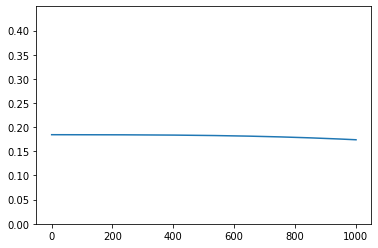

In [415]:
#решение в последний момент времени
fig, ax = plt.subplots()
ax.set_ylim(0, np.max(U)+0.1)
ax.plot(U[-1])

График в пространстве $u,x,t$:

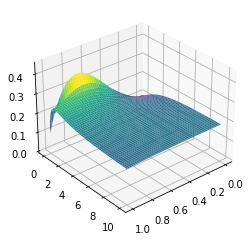

In [416]:
X = np.arange(0, 1+2*h, h)
Y = np.arange(0, 10+dt, dt)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_zlim(0, np.max(U)+0.1)
ax.view_init(30, 50)
ax.plot_surface(X, Y, np.array(U), cmap=plt.cm.viridis)

Gif анимация решения и вывод в файл:

  0%|          | 0/91 [00:00<?, ?it/s]

MovieWriter imagemagick unavailable; using Pillow instead.


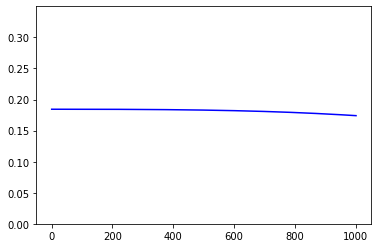

In [417]:
gif_(U, pth, method = '10sec_im')

# Явный метод

In [9]:
#зполняем слой при t=0
Uu = []    
Uu.append(U0)

## прямое по времени заполнение слоев
try:
    for n in tqdm(range(1, N+1)):
        if len(Uu) == n:
            Uu.append([0]*(M+1))
        for m in range(M-1, 0, -1):
            Uu[n][m] = Uu[n-1][m] + dt * (Uu[n-1][m])**2 * ((Uu[n-1][m-1] - 2*Uu[n-1][m] + Uu[n-1][m+1])/h**2 + alpha)
        Uu[n][0] = Uu[n][1]
        Uu[n][M] = Uu[n][M-1] - h*(Uu[n-1][M])**2 
except OverflowError as er:
    print(er)

  0%|          | 0/10000 [00:00<?, ?it/s]

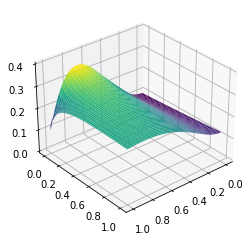

In [10]:
try:
    X = np.arange(0, 1+h, h)
    Y = np.arange(0, 1+dt, dt)
    X, Y = np.meshgrid(X, Y)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_zlim(0, 0.4)
    ax.view_init(30, 50)
    ax.plot_surface(X, Y, np.array(Uu), cmap=plt.cm.viridis)
except ValueError as er:
    print(er)

  0%|          | 0/100 [00:00<?, ?it/s]

MovieWriter imagemagick unavailable; using Pillow instead.


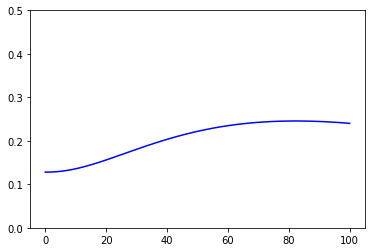

In [11]:
gif_(Uu, pth, method = 'ex')